In [1]:
import bt
import pandas
import matplotlib
import matplotlib.pyplot as plt
import talib

In [2]:
matplotlib.use('TkAgg')
%matplotlib inline

In [3]:
stock_symbol = 'spy, agg, nflx'
start_date = '2011-1-1'
end_date = '2020-12-1'

In [4]:
# Fetch some data
data = bt.get(stock_symbol, start=start_date)

In [5]:
# Recreate the strategy named First_Strat
First_Strat = bt.Strategy('First Strat', [bt.algos.RunMonthly(),
                                     bt.algos.SelectAll(),
                                     bt.algos.WeighEqually(),
                                     bt.algos.Rebalance()])

# Create a backtest named test
test = bt.Backtest(First_Strat, data)



In [6]:
# create a second strategy named Second_Strat
# Note only difference from First_Strat is that we RunWeekly and Weight using Inverse Volatility
# This means the strategy will make more trades and put more weight on less Volatile asset
Second_Strat = bt.Strategy('Second Strat', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.LimitWeights(limit=0.65),
                        bt.algos.Rebalance()])

# Test Second_Strat and name it test2
test2 = bt.Backtest(Second_Strat, data)

In [7]:
# To see the results side-by-side, we must tell the bt.run to use both tests
# All res2 commands will produce output comparing s1 and s2 because we have test and test2
results_both = bt.run(test, test2)

<AxesSubplot:title={'center':'Equity Progression'}>

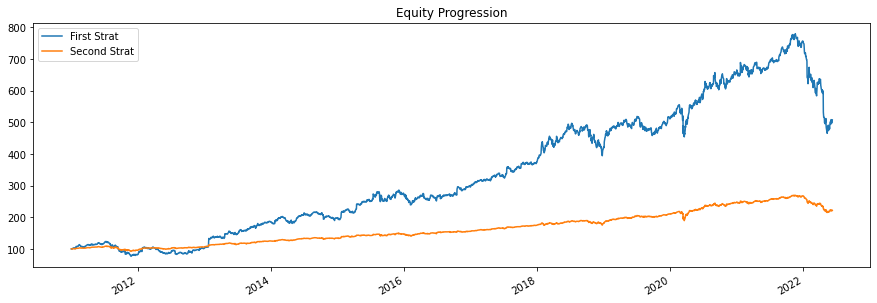

In [8]:
# res_First_Strat only has test in it, so you will only see Second_Strat from it
res_First_Strat = bt.run(test)

# res_Second_Strat only has test2 in it, so you will only see Second_Strat from it
res_Second_Strat = bt.run(test2)

# res2 plots here include both s1 and s2 info
results_both.plot()



In [9]:
results_both.display()


Stat                 First Strat    Second Strat
-------------------  -------------  --------------
Start                2011-01-02     2011-01-02
End                  2022-06-08     2022-06-08
Risk-free rate       0.00%          0.00%

Total Return         407.55%        121.86%
Daily Sharpe         0.81           0.95
Daily Sortino        1.33           1.45
CAGR                 15.27%         7.22%
Max Drawdown         -40.34%        -20.17%
Calmar Ratio         0.38           0.36

MTD                  1.42%          -0.04%
3m                   -14.34%        -6.76%
6m                   -32.95%        -16.90%
YTD                  -32.39%        -16.83%
1Y                   -24.07%        -11.74%
3Y (ann.)            0.80%          3.51%
5Y (ann.)            8.40%          5.94%
10Y (ann.)           19.39%         8.30%
Since Incep. (ann.)  15.27%         7.22%

Daily Sharpe         0.81           0.95
Daily Sortino        1.33           1.45
Daily Mean (ann.)    16.22%         7.27

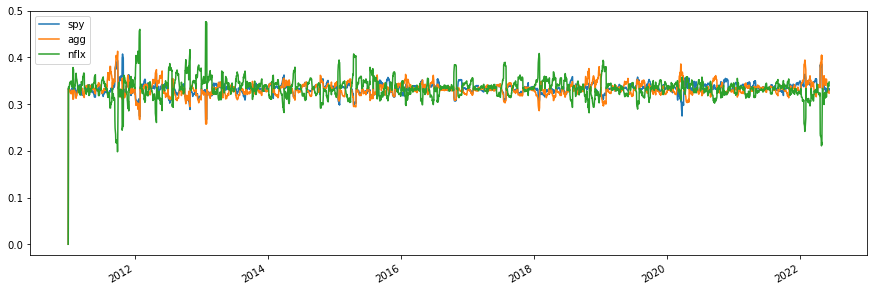

In [10]:

# Plot weights from the first strategy to illustrate the different weighting schemes
res_First_Strat.plot_security_weights()


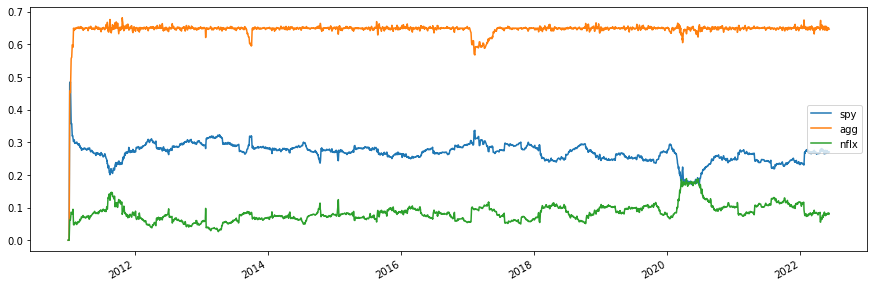

In [11]:
res_Second_Strat.plot_security_weights()


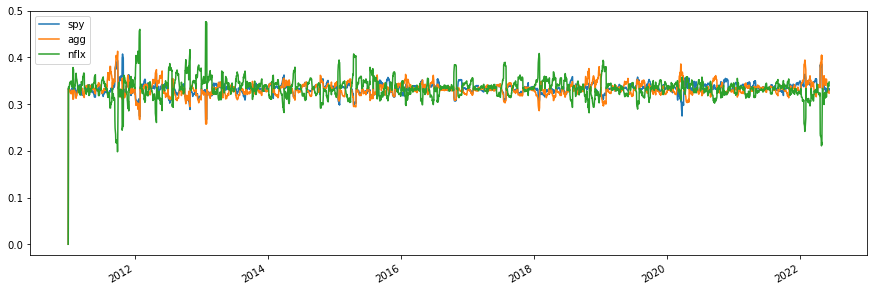

In [12]:
# For some reason, I cannot plot weights or histograms for both at the same time
results_both.plot_security_weights()